# 初期処理

In [2]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 画像の確認

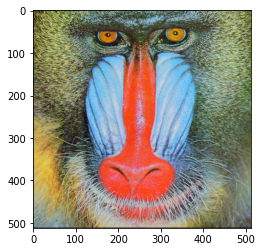

In [3]:
src_img = Image.open("./4.2.03.tiff")
plt.imshow(src_img)
plt.show()

In [4]:
width, height = src_img.size
width, height

(512, 512)

# ヒストグラムの確認

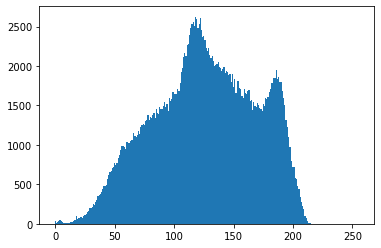

In [7]:
hist = np.zeros(256, dtype=np.int32)
for y in range(height):
    for x in range(width):
        r, g, b = src_img.getpixel((x, y))
        lv = sum((r, g, b)) // 3
        hist[lv] += 1
plt.figure()
x = range(0, 256)
plt.bar(x, hist, 1.0)
plt.show()

# 明るさの変更

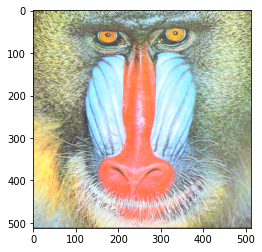

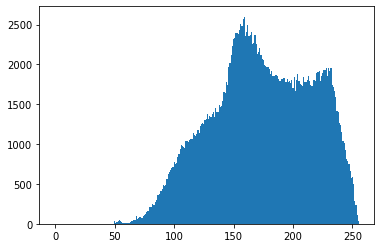

In [8]:
dst_img = Image.new("RGB", (width, height))
hist = np.zeros(256, dtype=np.int32)
for y in range(height):
    for x in range(width):
        r, g, b = src_img.getpixel((x, y))
        # 明るさ補正
        r += 50
        if r > 255:
            r = 255
        g += 50
        if g > 255:
            g = 255
        b += 50
        if b > 255:
            b = 255
        dst_img.putpixel((x, y), (r, g, b))
        lv = sum((r, g, b)) // 3
        hist[lv] += 1
plt.figure()
plt.imshow(dst_img)
plt.show()

plt.figure()
x = range(0, 256)
plt.bar(x, hist, 1.0)
plt.show()

# 2値化

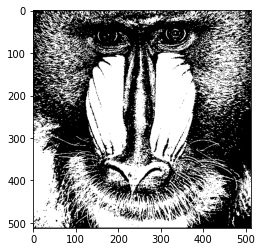

In [9]:
dst_img = Image.new("RGB", (width, height))
for y in range(height):
    for x in range(width):
        r, g, b = src_img.getpixel((x, y))
        lv = sum((r, g, b)) // 3

        # 2値化
        if lv < 128:
            dst_img.putpixel((x, y), (0, 0, 0))
        else:
            dst_img.putpixel((x, y), (255, 255, 255))
plt.figure()
plt.imshow(dst_img)
plt.show()

## 最適な閾値を求める

In [10]:
total = width * height
total

262144

In [12]:
p = total * 0.75
p

196608.0

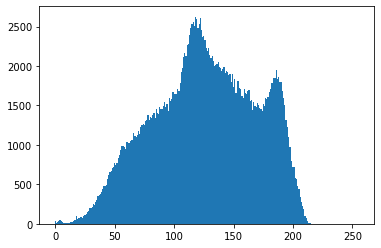

161

In [14]:
hist = np.zeros(256, dtype=np.int32)
for y in range(height):
    for x in range(width):
        r, g, b = src_img.getpixel((x, y))
        lv = sum((r, g, b)) // 3
        hist[lv] += 1
plt.figure()
x = range(0, 256)
plt.bar(x, hist, 1.0)
plt.show()

for i in range(256):
    n = sum(hist[0:i])
    if n >= p:
        threshold = i
        break
threshold

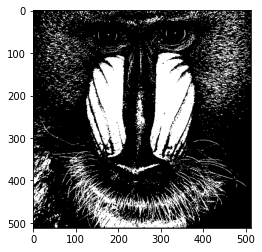

In [15]:
dst_img = Image.new("RGB", (width, height))
for y in range(height):
    for x in range(width):
        r, g, b = src_img.getpixel((x, y))
        lv = sum((r, g, b)) // 3

        # 2値化
        if lv < 161:
            dst_img.putpixel((x, y), (0, 0, 0))
        else:
            dst_img.putpixel((x, y), (255, 255, 255))
plt.figure()
plt.imshow(dst_img)
plt.show()